# Comparison between different algorithms for calculating the magnetic field produced by ellipsoids

The magnetic induction field produced by ellipsoids can be calculated by different algorithms, depending on the shape of the ellipsoid. Emerson et al. (1985) proposed algorithms for calculating the magnetic field produced by elliptic cylinder. Clark et al.(1986) proposed algorithms for calculating the magnetic field produced by triaxial ellipsoids.

This code compares the magnetic field produced by a triaxial ellipsoid approximated to a elliptic cylinder (semi-axis much larger than b and c) with the Emerson's elliptic cylinder.


* Emerson, D. W., Clark, D., and Saul, S. (1985). Magnetic exploration models incorporating remanence, demagnetization and anisotropy: Hp 41c handheld computer algorithms. Exploration Geophysics, 16(1):1–122.
* Clark, D., Saul, S., and Emerson, D. (1986). Magnetic and gravity anomalies of a triaxial ellipsoid. Exploration Geophysics, 17(4):189–200.

### Required dependencies

In [15]:
import numpy as np
from matplotlib import pyplot as plt

from fatiando import mesher, gridder

%matplotlib inline

### Auxiliary functions

In [16]:
import elliptic_cylinder as me2
import ellipsoid_class_unified as me5

### Computation points

In [17]:
# Geogrphic coordinates grid
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

In [18]:
# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

### Geomagnetic field

In [19]:
# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 90., 0.

### Center of the ellipsoid

In [20]:
#xc position x; yc position y; and zc depth
xc = 0.
yc = 0.
zc = 100.

### Remanent magnetization and susceptibility direction

In [21]:
#Remanent vector
intensity = 10000.
inclirem = 90.
declirem = 0.

#susceptibility directions
intensidadeA = 0.10
inclinacaoA = 90.
declinacaoA = 0.
intensidadeB = 0.10
inclinacaoB = 180.
declinacaoB = 0.
intensidadeC = 0.10
inclinacaoC = 0.
declinacaoC = 90.
k = np.array([[intensidadeA,inclinacaoA,declinacaoA],
              [intensidadeB,inclinacaoB,declinacaoB],
              [intensidadeC,inclinacaoC,declinacaoC]])

### ellipsoid orientation 

In [22]:
azimuth = 90.
delta = 0.
gamma = 0.

### Reference axis and axis difference

In [23]:
daxis = 1.
aref = 500000.

# Implementation  - ellipsoid Clark Triaxial Class

In [24]:
# ellipsoid axis
a = aref
b = daxis
c = daxis - 0.01

################################################################################################################################

# Create a ellipsoid model
model = [me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma,
                      {'remanence': np.array([10000, 90., 0.]),
                       'k1': np.array([0.1, 90., 0.]),
                       'k2': np.array([0.1, 180., 0.]),
                       'k3': np.array([0.1, 0., 90.])}
                      )]

# Calculate the anomaly for a given regional field
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model)
print JRD_cart

[[9845.1775005992658, 90.0, 6.646324335649333e-15]]


# Implementation  - Emerson's 2D elliptic Cylinder

In [25]:
# elliptic cylinder axis
b = daxis
c = daxis - 0.01

Bx_C, Bz_C,Tf_C = me2.elliptic (Xp,Yp,Zp,xc,yc,zc,b,c,delta,declirem,inclirem,intensity,dec,inc,inten,k)

## Resultado da minha função

### Plot Bx

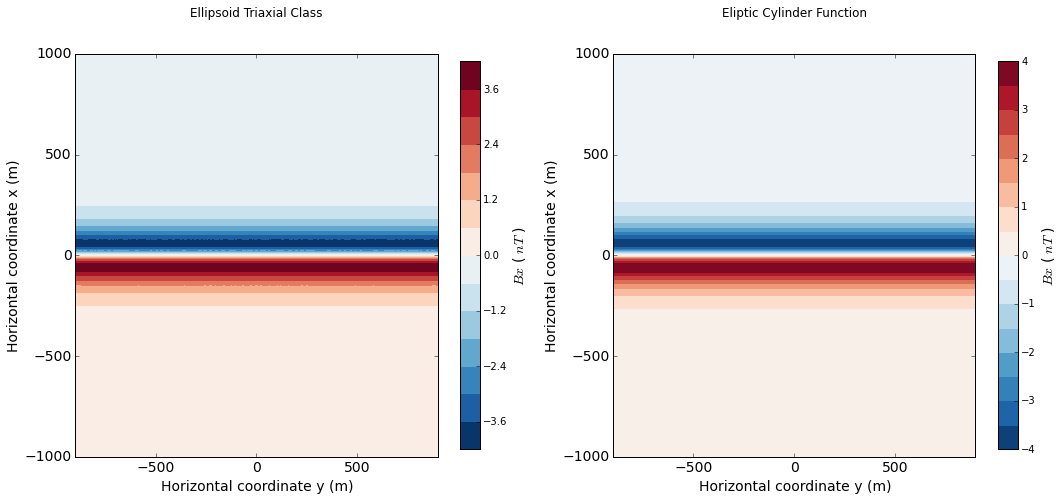

In [26]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx_C), np.min(Bx_C)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Eliptic Cylinder Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bx_C,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bx$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Bz

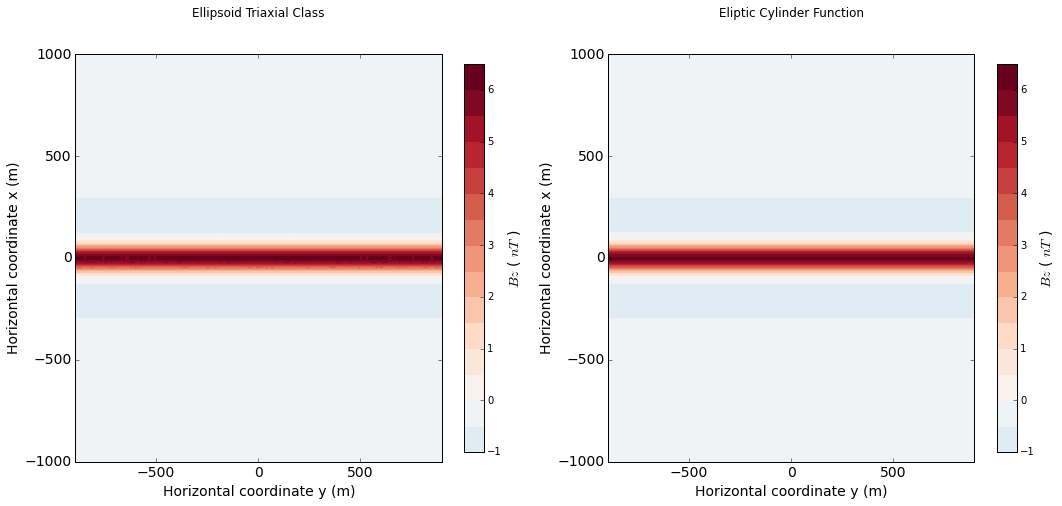

In [27]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz_C), np.min(Bz_C)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Eliptic Cylinder Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Bz_C,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$Bz$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

### Plot Approximate total-field anomaly

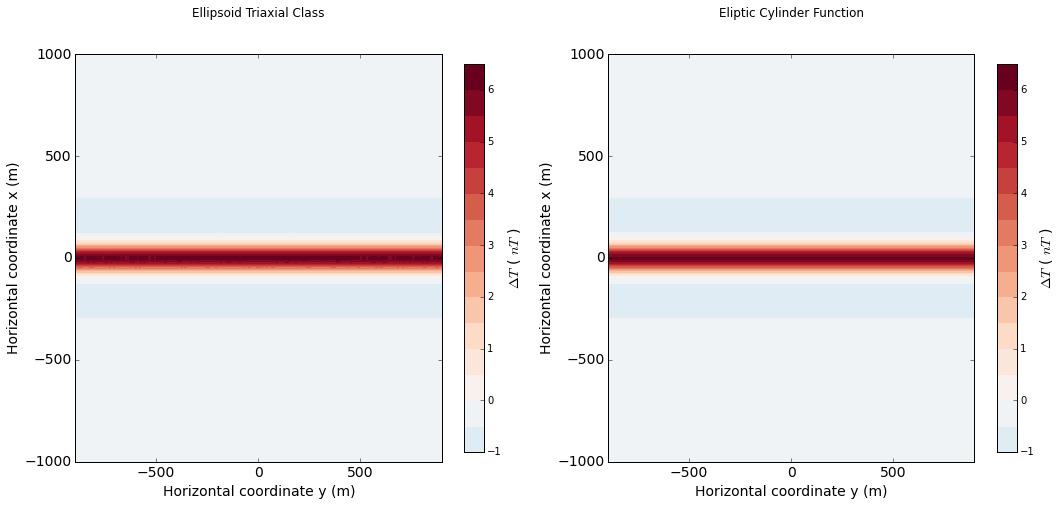

In [28]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf_C), np.min(Tf_C)]))

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Ellipsoid Triaxial Class', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Eliptic Cylinder Function', y=1.08)
plt.axis('scaled')
plt.tricontourf(Yp,Xp,Tf_C,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()

plt.savefig('..\\figures\\Elipsoid_cylinder_triaxial_Tf.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')